 # Función de correlación con pesos


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline

### Estimadores de la función de correlación

El estimador que usaremos es el siguiente:

#### Estimador de Correlación Landy-Szalay

$\xi_{LZ}^2 = 1+\frac{1}{N_{est}^2}\frac{DD}{RR}-2\frac{1}{N_{est}}\frac{DR(r)}{RR(r)}  $

In [2]:
# Estimador de Landy-Szalay  ND,NR numero de datos y datos random, 
# DD,RR,DR son los valores obtenidos en el histograma para cada bin de distancia.

def landy(ND,NR,DD,RR,DR):
    ND = ND*1.
    NR = NR*1.
    Nest2 = ND*(ND-1)/(NR*(NR-1))
    return 1+(DD/(RR*Nest2))-(2*DR/(RR*Nest2**.5))



In [3]:
# Función con lo que se obtiene una distribución uniforme de una caja de lado L,
# dim es la dimesion para 2D o 3D, N es el numero de datos
def caja(dim,L,N):
    return np.random.random((dim, N))*L-0.5*L

In [4]:
# Función con lo que se obtiene una distribución uniforme de un anillo

# Input values: r es el radio mayor, r1 el radio menor, N numero de puntos
def anillo(r,r1,N):
    anillo = []
    i=0
    dim=2
    # Ciclo que obtiene N puntos dentro de un circulo o esfera
    while i<N:
        point = np.random.random(dim)*2*r-r # Se crea el punto
        r_test = (point**2).sum(axis=0)**.5 
        # Se guarda el punto si el punto esta dentro de el circulo
        if (r_test <= r and r_test >= r1 ):
            anillo.append(point)
            i+=1
    anillo = np.array(anillo)
    anillo = anillo.T
    return anillo # Regresa los punos dentro del circulo

In [35]:
# Función con lo que se obtiene la distancia entre los puntos de la distribución

# Input values: N dimension, D son los datos, R datos random, 
# bins los intervalos, tipo es DD,RR,DR
def distancia(N,D,R,bins,tipo):
    
    if (tipo == 'DD' or tipo == 'RR'):
        # Obteniendo el arreglo de distancias
        dist = D[:,None] - D[...,None] # resta todas las combinaciones y los almacena en dos matrices una para cada renglon
        dist = (dist**2).sum(axis=0)**.5 # axis=0, asegura que use los datos de cada renglon, y no las columnas. Devuelve una matriz triangular
        dist = dist[np.triu_indices(N, k = 1)] # extrae el tringulo superior (puede ser el inferior pq es simetrica), hay q especificar el número N
    
    if tipo == 'DR':
        dist = D[:,None] - R[...,None]
        dist = (dist**2).sum(axis=0)**.5
        dist = dist.flatten() # Regresa las frecuencias en un arreglo de 1 dimensión
        
    #Histograma
    
    count, bins, ignored_D = plt.hist(dist,bins = bins,edgecolor = 'black',  linewidth=1)
    plt.title('Histograma de distancias datos %s'%tipo)
    plt.legend()
    return count # Regresa laS distancias, y las frecuencias del histograma

In [5]:
# Funcion para obtener las componentes x e y
def distancia_xy(D,R,tipo):
    dx =[]
    dy =[]
        
    #Histograma
    for i in range(np.shape(D)[1]): # número de datos de D
        for j in range(np.shape(D)[1]): # número de datos de D
            # Calculando la distancia entre el punto i e j
            if (tipo == 'DD' or tipo == 'RR'):
                if i != j :
                    xc=D[0][j]-D[0][i]
                    yc=D[1][j]-D[1][i]
                    dx.append(xc)
                    dy.append(yc)
            elif(tipo == 'DR'):
                xc=D[0][j]-R[0][i]
                yc=D[1][j]-R[1][i]
                dx.append(xc)
                dy.append(yc)
    dx=np.array(dx)
    dy=np.array(dy)
    return np.absolute(dx),np.absolute(dy)
    #return np.absolute(dx),np.absolute(dy)

### Aplicando las definiciones generamos datos del anillo y datos random

In [63]:
r,r1,L,ND,NR= 50,40,150,400,2000
bins = np.linspace(0,2*r,100)
dim = 2 # dimension de la caja

# Generando Datos anillo y datos random
D = anillo(r,r1,ND)
R = caja(2,L,NR)

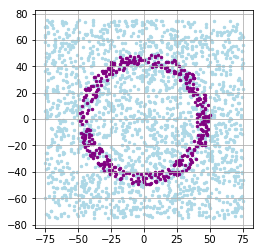

In [11]:
# Graficando los datos originales y los datos con corrimiento
x,y = D
xr,yr = R
plt.clf()
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.scatter(xr,yr,color='lightblue',s=6)
ax.scatter(x,y,color='purple',s=6)

ax.grid()
plt.legend()
plt.show()

# E1. a) 

w=1 para todos los puntos $x<50$ y w=2 para $x>50$.

In [12]:
# Haciendo el histograma con pesos
def histpesos(dx,dy,bins):
    hist_w = np.zeros(len(bins)) # Creo el arreglo donde guardare los datos del histograma
    for i in range(len(dx)):
        d_test=np.sqrt(dx[i]**2 + dy[i]**2)# Calculo distancia
        for j in range(len(bins)):
            if j<len(bins)-1:
                if (bins[j]< d_test < bins[j+1]): # Encuentro el bin al que corresponde la distancia
                    if dx[i]<50: # Condiciones para diferenciar el peso que le dare a la suma en el bin
                        hist_w[j]+= 1
                    else:
                        hist_w[j]+= 2
    return hist_w

In [13]:
# Calculando las componentes de las distancias para el anillo D

dx,dy = distancia_xy(D,None,'DD')
dx_r,dy_r = distancia_xy(R,None,'RR')
dx_DR,dy_DR = distancia_xy(D,R,'DR')



In [14]:
# Calculando frecuencias de los histogramas con pesos
DD = histpesos(dx,dy,bins)
RR = histpesos(dx_r,dy_r,bins)
DR = histpesos(dx_DR,dy_DR,bins)

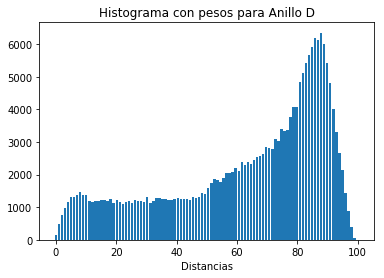

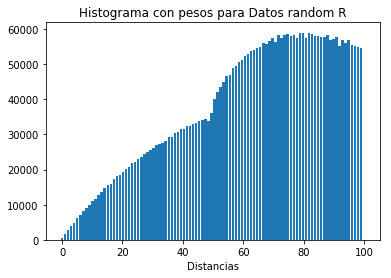

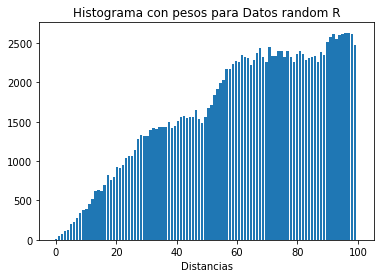

In [15]:
# Graficando el histograma de anillo D con diferentes pesos

plt.bar(bins,DD)
plt.title('Histograma con pesos para Anillo D')
plt.xlabel('Distancias')
plt.show()

# Graficando el histograma de datos R con diferentes pesos

plt.bar(bins,RR)
plt.title('Histograma con pesos para Datos random R')
plt.xlabel('Distancias')
plt.show()

# Graficando el histograma de datos DR con diferentes pesos

plt.bar(bins,DR)
plt.title('Histograma con pesos para Datos random R')
plt.xlabel('Distancias')
plt.show()

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in divide
  


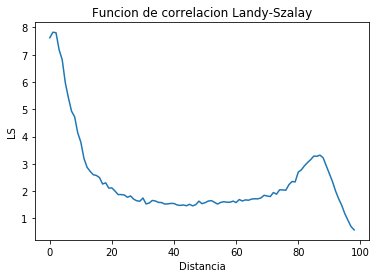

In [16]:
# Graficando la función de correlación Landy

plt.plot(landy(ND,NR,DD,RR,DR))
plt.title('Funcion de correlacion Landy-Szalay')
plt.xlabel('Distancia')
plt.ylabel('LS')
plt.show()



# E1. b)

Con dos anillos pegados. Uno de radio ligeramente menor que
el otro. Poner un peso de W=1 para el radio exterior y de W=2
para el interior y comparar con el caso sin pesos.

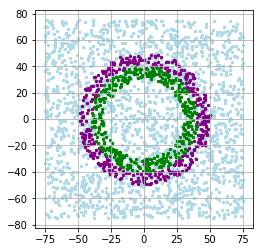

In [28]:
# Usamos los datos anteriores y solo generamos el nuevo anillo interior radio mayor igual a r1, radio menor r2
r2 = 30
D1 = anillo(r1,r2,ND)

# Graficando los datos originales y los datos con corrimiento
x1,y1 = D1
plt.clf()
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.scatter(xr,yr,color='lightblue',s=6)
ax.scatter(x,y,color='purple',s=6)
ax.scatter(x1,y1,color='g',s=6)
ax.grid()
plt.legend()
plt.show()

# Calculando componentes de la distancia para el anillo interior
dx1,dy1 = distancia_xy(D1,None,'DD')

ANILLO INTERIOR


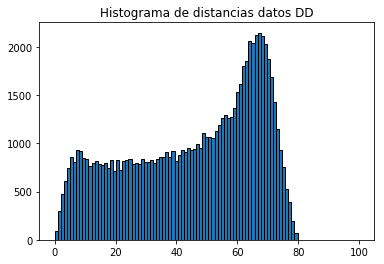

ANILLO EXTERIOR


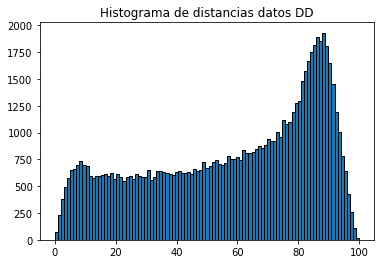

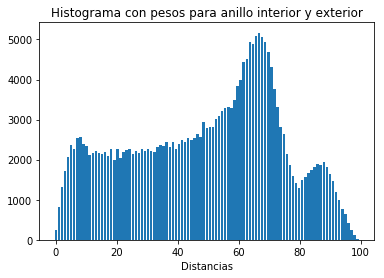

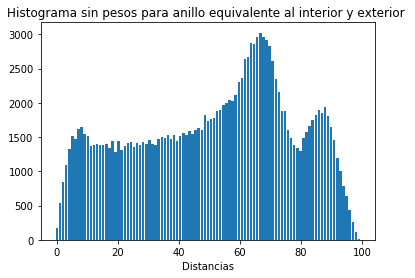

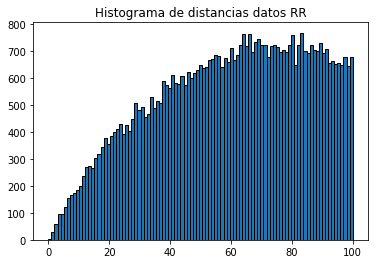

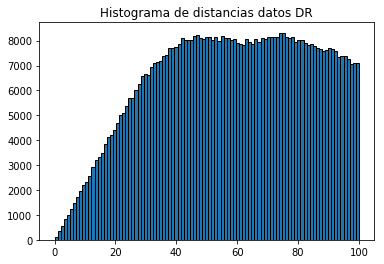

In [57]:
# Usando la definición de distancia normal para cada anillo por separado, despues agregaremos el peso

print 'ANILLO INTERIOR'
DD1 = distancia(ND,D1,None,bins,'DD')
plt.show()

print 'ANILLO EXTERIOR'
DD = distancia(ND,D,None,bins,'DD')
plt.show()

# El histograma de ambos anillos sera la suma de DD1 + DD
# Agregando peso w=1 para anillo interior, w=2 para anillo exterior
DDT = DD*1+DD1*2
DDT = np.array(DDT)
# Graficando nuevo histograma
plt.bar(bins[:-1],DDT)
plt.title('Histograma con pesos para anillo interior y exterior')
plt.xlabel('Distancias')
plt.show()

# Caso de anillos equivalente a uno solo sin pesos
DDS = DD+DD1
DDS = np.array(DDS)
# Graficando nuevo histograma
plt.bar(bins[:-1],DDS)
plt.title('Histograma sin pesos para anillo equivalente al interior y exterior ')
plt.xlabel('Distancias')
plt.show()

# Histogramas para datos random y DR
RR = distancia(ND,R,None,bins,'RR')
plt.show()

DR = distancia(ND,D,R,bins,'DR')
plt.show()

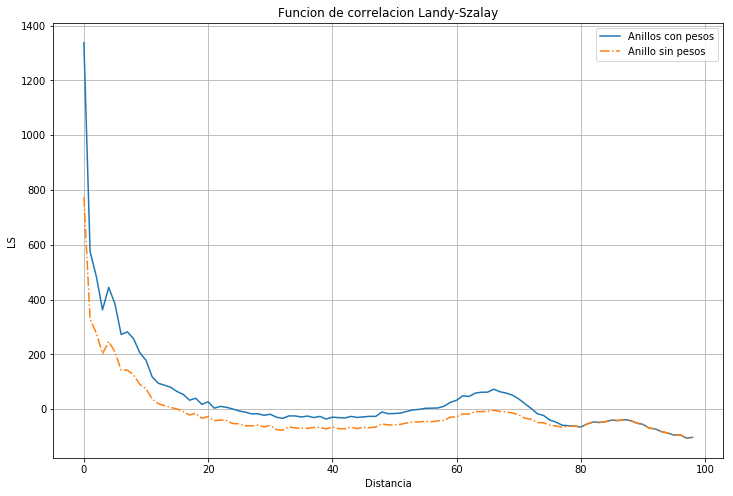

In [62]:
# Graficando la función de correlación Landy-Salay

# Anillos con pesos
plt.figure(figsize=(12,8))
plt.plot(landy(ND,NR,DDT,RR,DR),label='Anillos con pesos')
# Anillo sin pesos
plt.plot(landy(ND,NR,DDS,RR,DR),'-.',label='Anillo sin pesos')
plt.title('Funcion de correlacion Landy-Szalay')
plt.xlabel('Distancia')
plt.ylabel('LS')
plt.legend()
plt.grid()
plt.show()